Team Members: Laraib Zia, Iman Durrani, Wania Ismail, Saad Peshiman

Introduction: 

We sourced our data from a Kaggle Dataset which included variables such as age, work class, education, race relationship status, and other variables. The variable that we looked to analyze was income level of being either above 50K or below 50K. We wanted to answer the questions of which variables had impacts on income being above 50K or below 50K.


Data prep:

We prepared our data by creating a clean dataframe called income by dropping all rows with at least 1 NA. This left the dataset with 30162 rows. We then dropped columns which had lowest correlations to the target variable (income >50K), and ones we didn't think would have an impact(capital-loss, native-country, relationship) based on the results from the heatmapping and wrangled data. Finally, we used pandas and numpy to wrangle the data and convert categorical variables to dummy variables in order to run the models.


EDA:

We used .info(), .head(), and .shape() methods to better understand the dataframes. In order to explore the variables, we made a few plots using seaborn. We plotted the counts of education, race, age, and income >50K. We also plotted barplots of education v income and workclass v income. The analysis methods we utilized include Logistic Regression, Decision Tree Classification, XGBoost, and Neural Networks. Some of the packages we used include pandas, numpy, matplotlib, pyplot, seaborn, sklearn, torch, and torchvision. 

Analysis:

For our dataset, we can conclude that the most fitting algorithm is the XGboost model with an accuracy of 0.851. This is followed by logistic regression (0.839), keras (0.838), and decision tree (0.800). XGboost is the most ideal algorithm evaluation technique for larger datasets, which was optimal for our dataset containing over 30k values. Not only is it one of the quickest algorithms, it was also able to give the most accuracy, making it the most optimal evaluation technique for further predictions. However, one of the disadvantages is that it has the ability to contain high variance, from which variation between the test and training datasets can cause consequential discrepancies with estimating model accuracy.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import plot_importance

%matplotlib inline

In [ ]:
income_df = pd.read_csv("income.csv")
income_df.head()
#outcome variable - income >50K; 0: not greater than 50k, 1: greater than 50K

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
#income_df.info() 32561 total rows before cleaning 
#income_df.isnull().sum() # null values in workclass (object), occupation (object), and native-country (object)

#create clean df called income by dropping all rows with at least 1 NA (30162 rows left)
income = income_df.dropna()
income.info()
income.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income >50K     30162 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64

[Text(0, 0, 'Bachelors'),
 Text(0, 0, 'HS-grad'),
 Text(0, 0, '11th'),
 Text(0, 0, 'Masters'),
 Text(0, 0, '9th'),
 Text(0, 0, 'Some-college'),
 Text(0, 0, 'Assoc-acdm'),
 Text(0, 0, '7th-8th'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Assoc-voc'),
 Text(0, 0, 'Prof-school'),
 Text(0, 0, '5th-6th'),
 Text(0, 0, '10th'),
 Text(0, 0, 'Preschool'),
 Text(0, 0, '12th'),
 Text(0, 0, '1st-4th')]

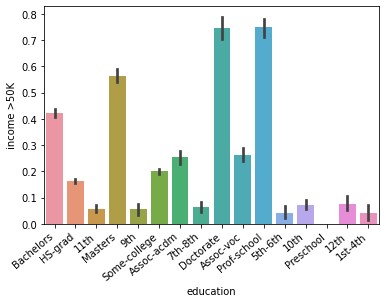

In [ ]:
# education v income
ed_v_income = sns.barplot(x="education", y="income >50K", data = income)
ed_v_income.set_xticklabels(ed_v_income.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, 'State-gov'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Without-pay')]

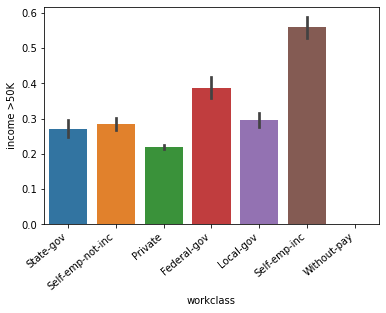

In [ ]:
#age v income
age_v_income = sns.barplot(x="workclass", y="income >50K", data = income)
age_v_income.set_xticklabels(age_v_income.get_xticklabels(), rotation=40, ha="right")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


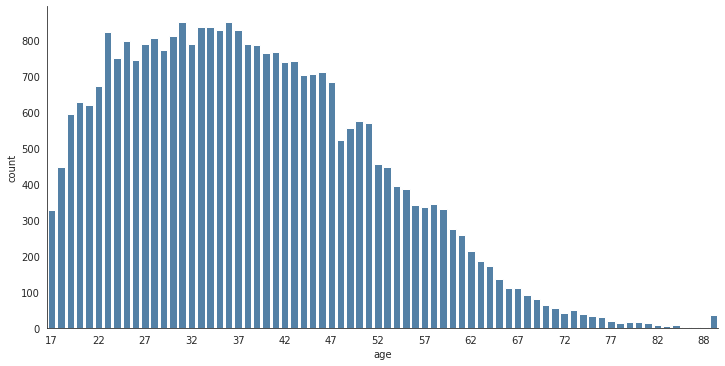

In [ ]:
#Using Seaborn to visualize the counts of age

with sns.axes_style('white'):
    g = sns.factorplot("age", data=income, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


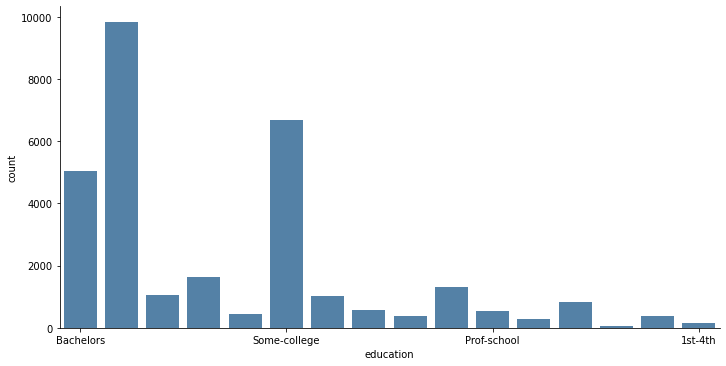

In [ ]:
#Sns plot for counts of education 

with sns.axes_style():
    g = sns.factorplot("education", data=income, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


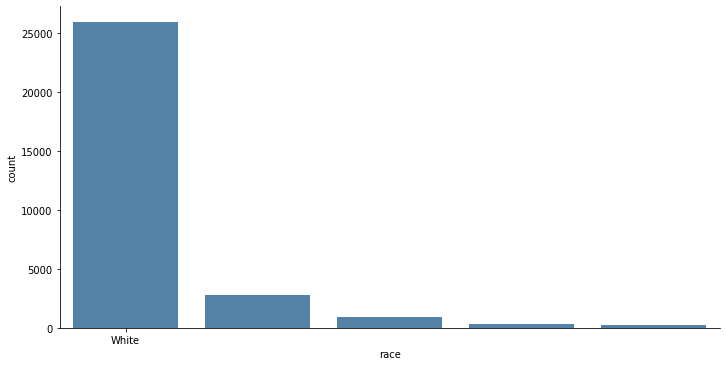

In [ ]:
#Sns plot for counts of income

with sns.axes_style():
    g = sns.factorplot("race", data=income, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
#Using Seaborn to visualize the income>50K count of the data 

income['income >50K'].value_counts()

0    22654
1     7508
Name: income >50K, dtype: int64

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
age,1.000000,0.043526,0.080154,0.060165,0.101599,0.241998
education-num,0.043526,1.000000,0.124416,0.079646,0.152522,0.335286
capital-gain,0.080154,0.124416,1.000000,-0.032229,0.080432,0.221196
capital-loss,0.060165,0.079646,-0.032229,1.000000,0.052417,0.150053
hours-per-week,0.101599,0.152522,0.080432,0.052417,1.000000,0.229480
income >50K,0.241998,0.335286,0.221196,0.150053,0.229480,1.000000


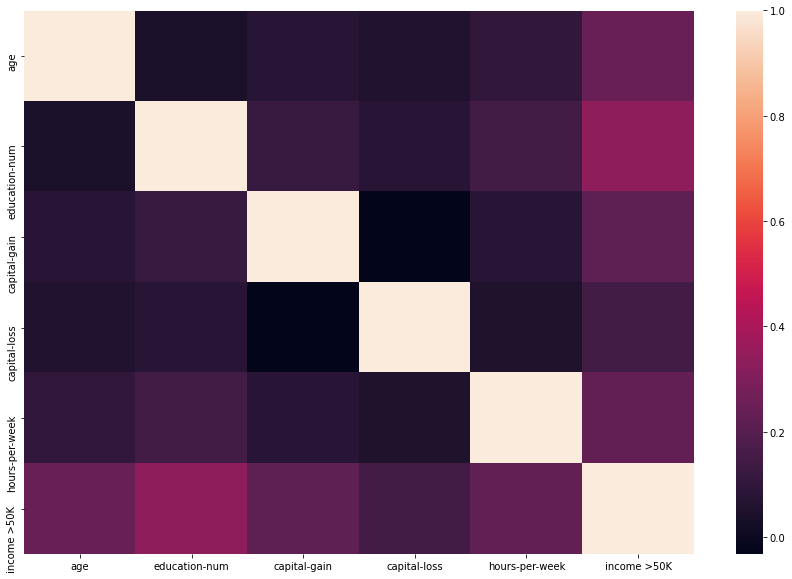

In [ ]:
# correlation matrix and heat map
cm = income.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(income.corr())
cm

In [ ]:
# drop columns with low correlation to income>50K and keep only the more important features 
income_clean = income.drop(["capital-loss", "native-country", "relationship"], axis = 1)
income_clean.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,hours-per-week,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,40,0


In [ ]:
# get dummy variables for object type columns

cat = income_clean.select_dtypes(include=['object']).axes[1]
for col in cat:
    income_clean = pd.concat([income_clean, pd.get_dummies(income_clean[col], prefix=col, prefix_sep=':')], axis=1)
    income_clean.drop(col, axis=1, inplace=True)
income_clean.head()

,age,education-num,capital-gain,hours-per-week,income >50K,workclass:Federal-gov,workclass:Local-gov,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay,education:10th,education:11th,education:12th,education:1st-4th,education:5th-6th,education:7th-8th,education:9th,education:Assoc-acdm,education:Assoc-voc,education:Bachelors,education:Doctorate,education:HS-grad,education:Masters,education:Preschool,education:Prof-school,education:Some-college,marital-status:Divorced,marital-status:Married-AF-spouse,marital-status:Married-civ-spouse,marital-status:Married-spouse-absent,marital-status:Never-married,marital-status:Separated,marital-status:Widowed,occupation:Adm-clerical,occupation:Armed-Forces,occupation:Craft-repair,occupation:Exec-managerial,occupation:Farming-fishing,occupation:Handlers-cleaners,occupation:Machine-op-inspct,occupation:Other-service,occupation:Priv-house-serv,occupation:Prof-specialty,occupation:Protective-serv,occupation:Sales,occupation:Tech-support,occupation:Transport-moving,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,sex:Female,sex:Male
0,39,13,2174,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,50,13,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,38,9,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,7,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,28,13,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
#move the target variable income >50K back to the end of the dataframe because the order of the columns changed
income_clean = income_clean[[col for col in income_clean.columns if col != 'income >50K'] + ['income >50K']]
income_clean.head()

,age,education-num,capital-gain,hours-per-week,workclass:Federal-gov,workclass:Local-gov,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay,education:10th,education:11th,education:12th,education:1st-4th,education:5th-6th,education:7th-8th,education:9th,education:Assoc-acdm,education:Assoc-voc,education:Bachelors,education:Doctorate,education:HS-grad,education:Masters,education:Preschool,education:Prof-school,education:Some-college,marital-status:Divorced,marital-status:Married-AF-spouse,marital-status:Married-civ-spouse,marital-status:Married-spouse-absent,marital-status:Never-married,marital-status:Separated,marital-status:Widowed,occupation:Adm-clerical,occupation:Armed-Forces,occupation:Craft-repair,occupation:Exec-managerial,occupation:Farming-fishing,occupation:Handlers-cleaners,occupation:Machine-op-inspct,occupation:Other-service,occupation:Priv-house-serv,occupation:Prof-specialty,occupation:Protective-serv,occupation:Sales,occupation:Tech-support,occupation:Transport-moving,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,sex:Female,sex:Male,income >50K
0,39,13,2174,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,50,13,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,38,9,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,53,7,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,28,13,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
#split into features and target
X = income_clean.iloc[:,0:-1] 
y = income_clean['income >50K']

X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income >50K, dtype: int64

In [ ]:
# split into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# get shape of each
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22621, 55), (22621,), (7541, 55), (7541,))

In [ ]:
#logistic regression
LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_)

print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Classes [0 1]
Intercept [-1.8432023]
Coefficients [[ 3.63057408e-01  3.81116781e-01  2.29788636e+00  3.53781870e-01
   1.25989742e-01 -4.25362937e-02  5.52805017e-02  4.54107703e-02
  -1.09274707e-01 -5.20564712e-02 -1.49302240e-01 -6.73337678e-02
  -8.21103207e-02 -5.75571724e-02 -5.17040821e-02 -8.08774179e-02
  -7.98281339e-02 -1.10170276e-01 -2.43926154e-02 -2.57687841e-02
   1.53258908e-01  1.11625311e-01 -5.41624093e-02  1.49287658e-01
  -4.80950986e-01  1.47052853e-01 -2.50742784e-03 -2.25543874e-01
   6.43229041e-02  7.71424592e-01 -7.15584661e-02 -5.57531806e-01
  -1.21606674e-01 -1.08904902e-01  4.55053419e-04 -8.82497646e-02
  -6.54472045e-03  2.61375496e-01 -1.96416966e-01 -1.64334034e-01
  -9.07944774e-02 -2.56171717e-01 -2.57574703e-01  1.67525392e-01
   8.25163776e-02  7.56095110e-02  1.13383195e-01 -4.26215249e-02
  -4.12647512e-02 -1.14073206e-03 -1.47561693e-02 -5.74391271e-02
   3.88326429e-02 -3.45365119e-02  3.45365119e-02]]
Accuracy 0.8399416523007559
            

In [ ]:
# decision tree classification 
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X_train,y_train)
y_pred= dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8006895637183398

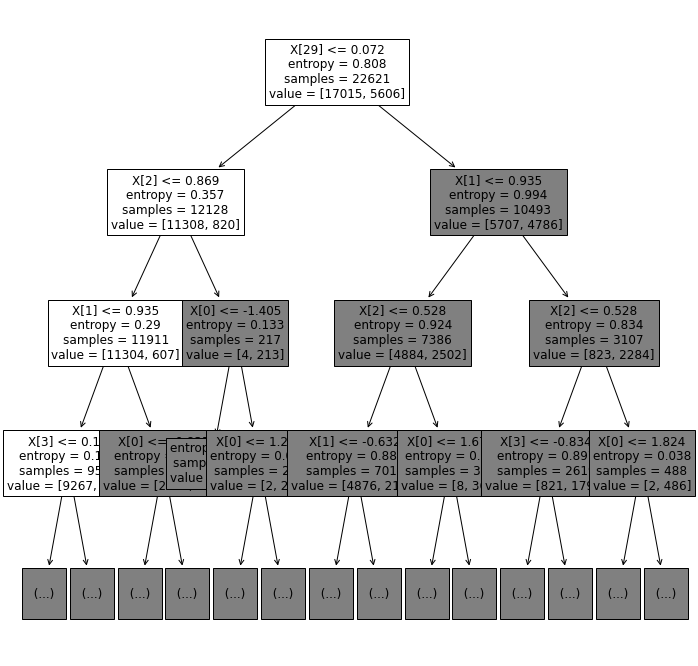

In [ ]:
# tree.plot_tree 
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=dtc, max_depth= 3,fontsize=12);

accuracy: 0.851346


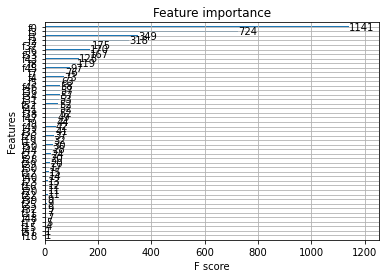

In [ ]:
#xgboost with display of feature importance
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))
xgb.plot_importance(xg_cl)
plt.show()

Feature: 0, Score: 0.00771
Feature: 1, Score: 0.34177
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00615
Feature: 4, Score: 0.07588
Feature: 5, Score: 0.01769
Feature: 6, Score: 0.00848
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00375
Feature: 9, Score: 0.00367
Feature: 10, Score: 0.00879
Feature: 11, Score: 0.00195
Feature: 12, Score: 0.00533
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00187
Feature: 17, Score: 0.00373
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01106
Feature: 20, Score: 0.00362
Feature: 21, Score: 0.00320
Feature: 22, Score: 0.00200
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00702
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00393
Feature: 27, Score: 0.01022
Feature: 28, Score: 0.00185
Feature: 29, Score: 0.00374
Feature: 30, Score: 0.18047
Feature: 31, Score: 0.01156
Feature: 32, Score: 0.01067
Feature: 33, Score: 0.00450
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

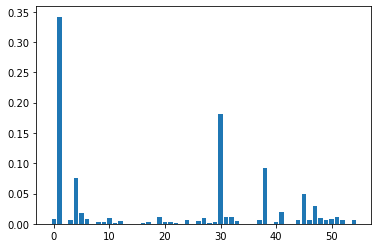

In [ ]:
# decision tree for feature importance on a classification problem
# define dataset
X, y = make_classification(n_samples=1000, n_features=55, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# neural networks - keras (binary classification)
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape= (55,), activation = 'sigmoid'))
model.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 56        
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 20)
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy: ",accuracy)

Epoch 1/20
707/707 [==============================] - 2s 1ms/step - loss: 0.6075 - accuracy: 0.6836
Epoch 2/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3825 - accuracy: 0.8315
Epoch 3/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3591 - accuracy: 0.8375
Epoch 4/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3451 - accuracy: 0.8418
Epoch 5/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3452 - accuracy: 0.8384
Epoch 6/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3418 - accuracy: 0.8414
Epoch 7/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3409 - accuracy: 0.8407
Epoch 8/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3424 - accuracy: 0.8400
Epoch 9/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.8481
Epoch 10/20
707/707 [==============================] - 1s 1ms/step - loss: 0.3340 - accuracy: 0.8461

In [ ]:
# neural networks - pytorch
# input layer - number of neurons is equal to number of features/columns (55)
# output layer - number of classes (0 or 1 for income >50k)
# hidden layer - 28 (average of input and output layers)
import torch 
import torch.nn as nn
import torchvision
import torch.utils.data
import torchvision.transforms as transforms
import torch

class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 55)
    self.fc2 = nn.Linear(110, 110)
    self.fc3 = nn.Linear(110, 2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))
net = Net(X_train.shape[1])
print(net)


Net(
  (fc1): Linear(in_features=55, out_features=55, bias=True)
  (fc2): Linear(in_features=110, out_features=110, bias=True)
  (fc3): Linear(in_features=110, out_features=2, bias=True)
)


Compare results of the algorithms

*   logistic regresssion accuracy: 0.839
*   decision tree accuracy: 0.800
* xgboost accuracy: 0.851
* keras accuracy: 0.838